In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
from keras.datasets import mnist
from keras.utils import np_utils      #独热处理
np.random.seed(10)

In [8]:
(x_Train,y_Train), (x_Test, y_Test) = mnist.load_data()

# 数据预处理

In [9]:
x_Train_4D = x_Train.reshape(60000, 28, 28, 1).astype(np.float32)
x_Test_4D = x_Test.reshape(10000, 28, 28, 1).astype(np.float32)

In [10]:
x_Train4D_normalize = x_Train_4D/255
x_Test4D_normalize = x_Test_4D/255

In [11]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D    #平坦层，卷积层，池化层

In [21]:
model=Sequential()
#建立卷积层1
model.add(Conv2D(filters=16,                  #建立16个滤镜
                kernel_size=(5,5),          #滤镜大小5*5
                padding="same",               #卷积运算产生的图片大小不变
                input_shape=(28, 28, 1),      #前两个数值为像素大小，后一数值为单色
                activation="relu"))
#建立池化层1
model.add(MaxPooling2D(pool_size=(2, 2)))     #4-->1
#建立卷积层2
model.add(Conv2D(filters=36,
                kernel_size=(5, 5),
                padding="same",
                activation="relu"))
#建立池化层2
model.add(MaxPooling2D(pool_size=(2, 2)))
#加入DropOut减少过拟合
model.add(Dropout(0.25))                     #随机放弃25%的神经元
#建立平坦层
model.add(Flatten())
#建立隐藏层   隐藏层中有128个神经元
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))                     #随机放弃50%的神经元
#建立输出层
model.add(Dense(10, activation="softmax"))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [23]:
model.compile(loss = "categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [25]:
train_history = model.fit(x=x_Train4D_normalize,
                         y=y_TrainOneHot,
                         verbose=2,
                         epochs=10,
                         validation_split=0.2,
                         batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 12s - loss: 0.4942 - acc: 0.8454 - val_loss: 0.1021 - val_acc: 0.9705
Epoch 2/10
 - 4s - loss: 0.1380 - acc: 0.9585 - val_loss: 0.0701 - val_acc: 0.9792
Epoch 3/10
 - 4s - loss: 0.1014 - acc: 0.9698 - val_loss: 0.0545 - val_acc: 0.9838
Epoch 4/10
 - 4s - loss: 0.0816 - acc: 0.9761 - val_loss: 0.0483 - val_acc: 0.9854
Epoch 5/10
 - 4s - loss: 0.0706 - acc: 0.9788 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 6/10
 - 4s - loss: 0.0626 - acc: 0.9811 - val_loss: 0.0411 - val_acc: 0.9879
Epoch 7/10
 - 4s - loss: 0.0539 - acc: 0.9839 - val_loss: 0.0359 - val_acc: 0.9903
Epoch 8/10
 - 4s - loss: 0.0485 - acc: 0.9856 - val_loss: 0.0346 - val_acc: 0.9898
Epoch 9/10
 - 4s - loss: 0.0449 - acc: 0.9861 - val_loss: 0.0337 - val_acc: 0.9903
Epoch 10/10
 - 4s - loss: 0.0433 - acc: 0.9858 - val_loss: 0.0331 - val_acc: 0.9903


In [26]:
def  show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [27]:
def save_result(label, prediction, path, name):
    result = pd.DataFrame({"label":label, "prediction":prediction})
    full_path = path+name+".csv"
    result.to_csv(full_path, index=False)

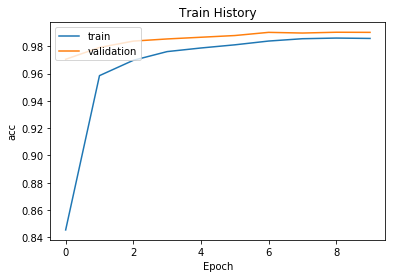

In [40]:
show_train_history(train_history, "acc", "val_acc")

In [33]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)

10000/10000 [==============================] - 2s 177us/step


In [34]:
scores[1]

0.9912

In [37]:
prediction = model.predict_classes(x_Test4D_normalize)

In [38]:
print(pd.crosstab(y_Test, prediction, rownames=["label"], colnames=["prediction"]))

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1128,2,1,0,1,1,1,1,0
2,0,1,1027,0,1,0,0,2,1,0
3,0,0,1,1007,0,1,0,0,1,0
4,0,0,0,0,977,0,0,1,1,3
5,1,0,0,4,0,882,2,1,0,2
6,1,2,0,0,2,3,949,0,1,0
7,0,1,6,4,0,0,0,1016,1,0
8,1,0,1,4,0,1,0,2,962,3


In [41]:
save_result(y_Test, prediction, "C:/my python/project_mnist/", "mnist_MLP_prediction")